In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Bengal Gram Chana Data set!

In [3]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/bengal_gram_chana.csv')

In [4]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Prakasam,Giddalur,Bengal Gram Dal (Chana Dal),Other,Medium,4550,4650,4600,24-12-2015,Andhra Pradesh
1,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,28-11-2016,Andhra Pradesh
2,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,27-11-2016,Andhra Pradesh
3,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,26-07-2016,Andhra Pradesh
4,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,22-07-2016,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
58382,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal (Chana Dal),Bengal Gram Dal,FAQ,10400,10800,10600,07-08-2016,West Bengal
58383,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal (Chana Dal),Bengal Gram Dal,FAQ,10400,10800,10600,06-08-2016,West Bengal
58384,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal (Chana Dal),Bengal Gram Dal,FAQ,10400,10800,10600,05-08-2016,West Bengal
58385,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal (Chana Dal),Bengal Gram Dal,FAQ,10400,10800,10600,04-08-2016,West Bengal


# Pre-processing

In [5]:
df.shape

(58387, 10)

In [6]:
rows = df.shape[0]
rows

58387

In [7]:
cols = df.shape[1]
cols

10

In [8]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
State                        False
dtype: bool

## Dealing with Null Values!

In [9]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [10]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!
Column No: 10 = State has 0 Null values!


In [11]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 160 unique values!
The column Market Name has 220 unique values!
The column Commodity has 1 unique values!
The column Variety has 10 unique values!
The column Grade has 3 unique values!
The column Min Price (Rs./Quintal) has 1775 unique values!
The column Max Price (Rs./Quintal) has 1907 unique values!
The column Modal Price (Rs./Quintal) has 1956 unique values!
The column Price Date has 3029 unique values!
The column State has 20 unique values!


In [12]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date', 'State'],
      dtype='object')

In [13]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date', 'state'],
      dtype='object')


In [14]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state
0,Prakasam,Giddalur,Bengal Gram Dal (Chana Dal),Other,Medium,4550,4650,4600,24-12-2015,Andhra Pradesh
1,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,28-11-2016,Andhra Pradesh
2,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,27-11-2016,Andhra Pradesh
3,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,26-07-2016,Andhra Pradesh
4,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,22-07-2016,Andhra Pradesh


In [15]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [16]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year
0,Prakasam,Giddalur,Bengal Gram Dal (Chana Dal),Other,Medium,4550,4650,4600,24-12-2015,Andhra Pradesh,12,2015
1,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,28-11-2016,Andhra Pradesh,11,2016
2,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,27-11-2016,Andhra Pradesh,11,2016


In [17]:
df['price_date'].dtype


dtype('O')

In [18]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)               int64
max_price_(rs./quintal)               int64
modal_price_(rs./quintal)             int64
price_date                   datetime64[ns]
state                                object
month                                 int64
year                                  int64
dtype: object


In [19]:
df_copy = df

# Encoding Columns

## district Name

In [20]:
df['district_name'].nunique()

160

In [21]:
value_counts = df['district_name'].value_counts()

In [22]:
value_counts

Kanpur           2656
Gorakhpur        2429
Bulandshahar     2381
Shimoga          1808
Bangalore        1779
                 ... 
Sitapur             1
Pali                1
Karimnagar          1
Maharajganj         1
Koppal              1
Name: district_name, Length: 160, dtype: int64

In [23]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [24]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded
0,Prakasam,Giddalur,Bengal Gram Dal (Chana Dal),Other,Medium,4550,4650,4600,2015-12-24,Andhra Pradesh,12,2015,7
1,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,2016-11-28,Andhra Pradesh,11,2016,7
2,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,2016-11-27,Andhra Pradesh,11,2016,7
3,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,2016-07-26,Andhra Pradesh,7,2016,7
4,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,2016-07-22,Andhra Pradesh,7,2016,7


## market name

In [25]:
df['market_name'].nunique()

220

In [26]:
value_counts = df['market_name'].value_counts()

In [27]:
value_counts

Saharanpur        1773
Bangalore         1753
Shimoga           1516
Agra              1490
Bharthna          1361
                  ... 
Shankarapally        1
Anandnagar           1
Jafarganj            1
Jarar                1
Raghogarh            1
Name: market_name, Length: 220, dtype: int64

In [28]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [29]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded
0,Prakasam,Giddalur,Bengal Gram Dal (Chana Dal),Other,Medium,4550,4650,4600,2015-12-24,Andhra Pradesh,12,2015,7,1
1,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,2016-11-28,Andhra Pradesh,11,2016,7,6
2,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,8600,8700,8650,2016-11-27,Andhra Pradesh,11,2016,7,6
3,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,2016-07-26,Andhra Pradesh,7,2016,7,6
4,Prakasam,Markapur,Bengal Gram Dal (Chana Dal),Other,Medium,5800,6000,5900,2016-07-22,Andhra Pradesh,7,2016,7,6


In [30]:
df = df.drop('commodity',axis=1)

## variety

In [31]:
df['variety'].nunique()

10

In [32]:
value_counts = df['variety'].value_counts()

In [33]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [34]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Prakasam,Giddalur,Other,Medium,4550,4650,4600,2015-12-24,Andhra Pradesh,12,2015,7,1,3991
1,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-28,Andhra Pradesh,11,2016,7,6,3991
2,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-27,Andhra Pradesh,11,2016,7,6,3991
3,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-26,Andhra Pradesh,7,2016,7,6,3991
4,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-22,Andhra Pradesh,7,2016,7,6,3991


## grade

In [35]:
df['grade'].unique()

array(['Medium ', 'FAQ ', 'Large '], dtype=object)

In [36]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        57267
Medium      1055
Large         65
Name: grade, dtype: int64

In [37]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [38]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Prakasam,Giddalur,Other,Medium,4550,4650,4600,2015-12-24,Andhra Pradesh,12,2015,7,1,3991,1055
1,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-28,Andhra Pradesh,11,2016,7,6,3991,1055
2,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-27,Andhra Pradesh,11,2016,7,6,3991,1055
3,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-26,Andhra Pradesh,7,2016,7,6,3991,1055
4,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-22,Andhra Pradesh,7,2016,7,6,3991,1055


## state

In [39]:
df['state'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chattisgarh', 'Haryana',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Maharashtra', 'Manipur', 'Madhya Pradesh', 'Odisha', 'Rajasthan',
       'Telangana', 'Tamil Nadu', 'Tripura', 'Uttrakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [40]:
value_counts = df['state'].value_counts()
value_counts

Uttar Pradesh        36813
Jharkhand             5630
Karnataka             5586
Madhya Pradesh        2551
Assam                 2246
Manipur               1574
Maharashtra           1453
West Bengal           1338
Tripura                585
Rajasthan              187
Telangana               76
Uttrakhand              75
Tamil Nadu              68
Haryana                 62
Jammu and Kashmir       51
Andhra Pradesh          41
Kerala                  23
Chattisgarh             20
Bihar                    6
Odisha                   2
Name: state, dtype: int64

In [41]:
state_frequency = df['state'].value_counts(normalize=False)

# Create a new column with encoded values
df['state_encoded'] = df['state'].map(state_frequency)

In [42]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Prakasam,Giddalur,Other,Medium,4550,4650,4600,2015-12-24,Andhra Pradesh,12,2015,7,1,3991,1055,41
1,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-28,Andhra Pradesh,11,2016,7,6,3991,1055,41
2,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-27,Andhra Pradesh,11,2016,7,6,3991,1055,41
3,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-26,Andhra Pradesh,7,2016,7,6,3991,1055,41
4,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-22,Andhra Pradesh,7,2016,7,6,3991,1055,41


# Taking only the Encoded columns

In [43]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [44]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,7,1,3991,1055,41,12,2015,2015-12-24,4550,4650,4600
1,7,6,3991,1055,41,11,2016,2016-11-28,8600,8700,8650
2,7,6,3991,1055,41,11,2016,2016-11-27,8600,8700,8650
3,7,6,3991,1055,41,7,2016,2016-07-26,5800,6000,5900
4,7,6,3991,1055,41,7,2016,2016-07-22,5800,6000,5900
5,7,6,3991,1055,41,6,2016,2016-06-29,4300,4500,4400
6,7,6,3991,1055,41,6,2016,2016-06-27,4300,4500,4400
7,33,33,3991,1055,41,4,2016,2016-04-18,12000,14000,13000


# Heat Map

<ipython-input-45-f636cb7d937b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


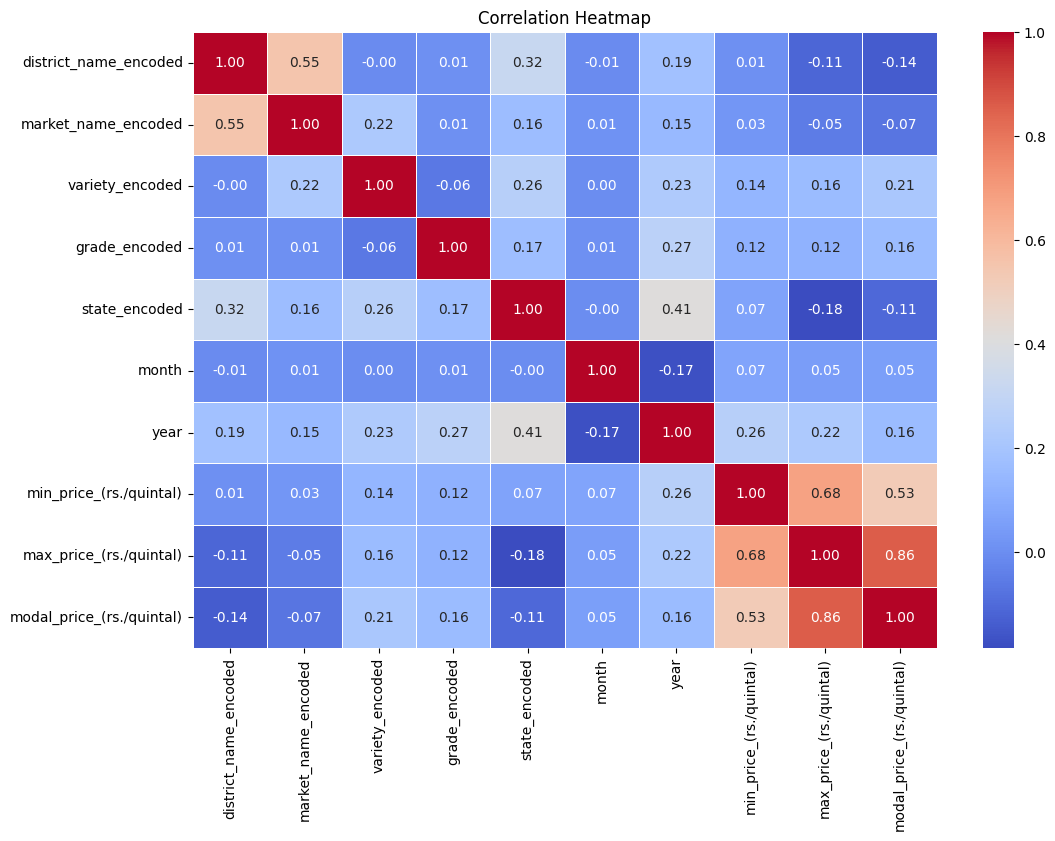

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [46]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [47]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,7,1,3991,1055,41,12,2015,2015-12-24,4550,4650,4600
1,7,6,3991,1055,41,11,2016,2016-11-28,8600,8700,8650
2,7,6,3991,1055,41,11,2016,2016-11-27,8600,8700,8650
3,7,6,3991,1055,41,7,2016,2016-07-26,5800,6000,5900
4,7,6,3991,1055,41,7,2016,2016-07-22,5800,6000,5900


# Outlier Removing rows

In [48]:
import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]



In [49]:
df_encoded = df_cleaned

## Standardizing values (min-max scalar)

In [50]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
41,87,87,3991,57267,2246,2,2015,2015-02-27,4200,4800,4500
42,87,87,3991,57267,2246,7,2014,2014-07-14,4200,4800,4500
43,87,87,3991,57267,2246,7,2014,2014-07-09,4200,4800,4500
44,87,87,3991,57267,2246,7,2014,2014-07-04,4200,4800,4500
45,87,87,3991,57267,2246,7,2014,2014-07-02,4200,4800,4500
...,...,...,...,...,...,...,...,...,...,...,...
58359,1320,1320,44322,57267,1338,8,2016,2016-08-31,9800,10200,10000
58360,1320,1320,44322,57267,1338,8,2016,2016-08-30,9800,10200,10000
58361,1320,1320,44322,57267,1338,8,2016,2016-08-29,9800,10200,10000
58362,1320,1320,44322,57267,1338,8,2016,2016-08-28,9800,10200,10000


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


In [52]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
41,0.032392,0.048533,0.090025,0.0,0.06096,2,2015,2015-02-27,4200,4800,4500
42,0.032392,0.048533,0.090025,0.0,0.06096,7,2014,2014-07-14,4200,4800,4500
43,0.032392,0.048533,0.090025,0.0,0.06096,7,2014,2014-07-09,4200,4800,4500
44,0.032392,0.048533,0.090025,0.0,0.06096,7,2014,2014-07-04,4200,4800,4500
45,0.032392,0.048533,0.090025,0.0,0.06096,7,2014,2014-07-02,4200,4800,4500


## Forward Stepwise Selection

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [54]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'state_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [55]:
print(forward_stepwise_selection(X, y))

Selected feature: variety_encoded, Score: 0.0857
Selected feature: year, Score: 0.1287
Selected feature: month, Score: 0.1391
Selected feature: state_encoded, Score: 0.1501
Selected feature: market_name_encoded, Score: 0.1566
Selected feature: district_name_encoded, Score: 0.1576
Selected feature: grade_encoded, Score: 0.1576
['variety_encoded', 'year', 'month', 'state_encoded', 'market_name_encoded', 'district_name_encoded', 'grade_encoded']


### All the features are closely important

## Linear Regression

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [58]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[6047.64022233, 6223.61779322, 6134.6561221 ],
       [5921.68655357, 6101.03506886, 6014.39694808],
       [5817.52719368, 5966.34882337, 5912.49796704],
       ...,
       [5893.60581408, 6514.74648839, 6238.8285149 ],
       [6129.29745278, 6559.41989892, 6348.05274296],
       [5628.25995869, 5795.95429958, 5710.25940725]])

In [60]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 639.3375883359405
Root Mean Square error is: 920.1617809941869
R2 score is: 0.15473430537059907


## Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [62]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 121.12876394757642
Root Mean Square error is: 278.7715088435509
R2 score is: 0.9225275435403434


## Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(
    n_estimators=200,  # Reduced number of trees
    max_depth=30,  # Reduced maximum depth
    random_state=42,
    bootstrap=True,
    warm_start=True,  # Enable incremental training
    n_jobs=-1  # Utilize all CPU cores
)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

In [64]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 119.29421247642655
Root Mean Square error is: 261.98686033371615
R2 score is: 0.9315868822873091


## XgBoost Regression

In [65]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.37,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 131.04073538837574
Root Mean Square error is: 265.83622176624687
R2 score is: 0.9295594976105876


## KNN Regression

In [66]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 142.1984630608899
Root Mean Square error is: 316.964234561692
R2 score is: 0.8997801429702114


# Datasets of Bengal_Gram_Chana

## Main

In [67]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Prakasam,Giddalur,Other,Medium,4550,4650,4600,2015-12-24,Andhra Pradesh,12,2015,7,1,3991,1055,41
1,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-28,Andhra Pradesh,11,2016,7,6,3991,1055,41
2,Prakasam,Markapur,Other,Medium,8600,8700,8650,2016-11-27,Andhra Pradesh,11,2016,7,6,3991,1055,41
3,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-26,Andhra Pradesh,7,2016,7,6,3991,1055,41
4,Prakasam,Markapur,Other,Medium,5800,6000,5900,2016-07-22,Andhra Pradesh,7,2016,7,6,3991,1055,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58382,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal,FAQ,10400,10800,10600,2016-08-07,West Bengal,8,2016,1320,1320,44322,57267,1338
58383,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal,FAQ,10400,10800,10600,2016-08-06,West Bengal,8,2016,1320,1320,44322,57267,1338
58384,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal,FAQ,10400,10800,10600,2016-08-05,West Bengal,8,2016,1320,1320,44322,57267,1338
58385,Howrah,Ramkrishanpur(Howrah),Bengal Gram Dal,FAQ,10400,10800,10600,2016-08-04,West Bengal,8,2016,1320,1320,44322,57267,1338


### Saving the dataframe of bengal_gram_chana

> Indented block



In [68]:
df.to_csv('bengal_gram_chanadf.csv')

## Encoded

In [69]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
41,0.032392,0.048533,0.090025,0.0,0.060960,2,2015,2015-02-27,4200,4800,4500
42,0.032392,0.048533,0.090025,0.0,0.060960,7,2014,2014-07-14,4200,4800,4500
43,0.032392,0.048533,0.090025,0.0,0.060960,7,2014,2014-07-09,4200,4800,4500
44,0.032392,0.048533,0.090025,0.0,0.060960,7,2014,2014-07-04,4200,4800,4500
45,0.032392,0.048533,0.090025,0.0,0.060960,7,2014,2014-07-02,4200,4800,4500
...,...,...,...,...,...,...,...,...,...,...,...
58359,0.496798,0.744357,1.000000,0.0,0.036293,8,2016,2016-08-31,9800,10200,10000
58360,0.496798,0.744357,1.000000,0.0,0.036293,8,2016,2016-08-30,9800,10200,10000
58361,0.496798,0.744357,1.000000,0.0,0.036293,8,2016,2016-08-29,9800,10200,10000
58362,0.496798,0.744357,1.000000,0.0,0.036293,8,2016,2016-08-28,9800,10200,10000


### Saving the encoded dataframe of bengal_gram_chana

In [70]:
df_encoded.to_csv('bengal_gram_chanaencdf.csv')